# Machine Learning - SVM

* SVM aplicado na classificação de flores e na classificação de músicas do Spotify.
* O SVM será utilizado para criação de classificador que identifica possíveis músicas que um usuário poderia gostar.
* Iremos treinar o algoritmo, validar o modelo e fazer tunning dos parâmetros do SVM.

**Bibliotecas utilizadas**

In [32]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm

**Importando dataset Iris**

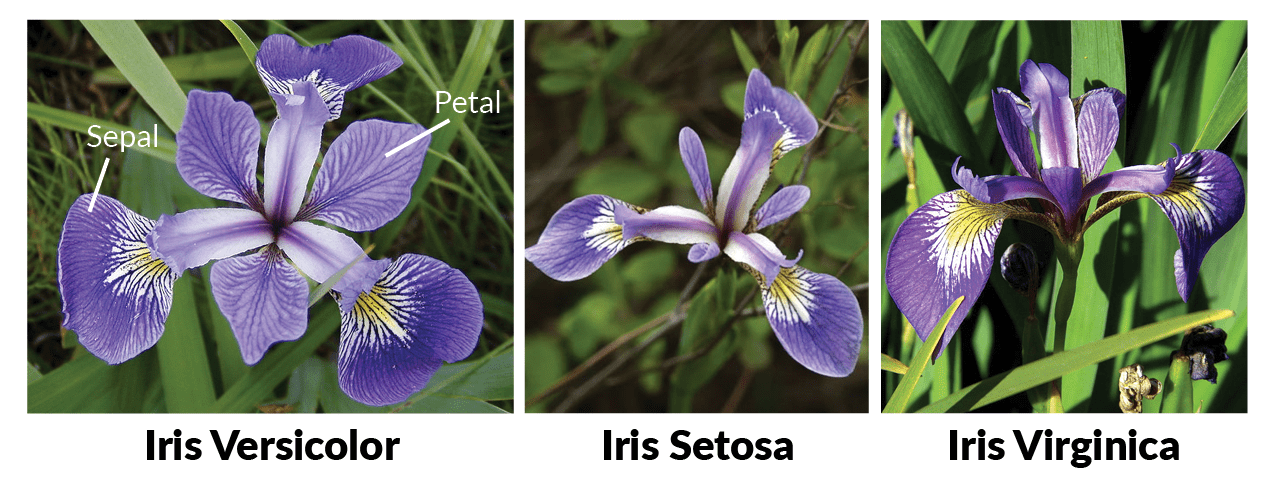

In [33]:
from IPython.display import Image
Image("imagens/iris-image.png",width=600, height=600)

In [34]:
# Carregando o arquivo e criando o dataset_iris
dataset_iris = pd.read_csv('datasets/iris.csv')

In [35]:
# Visualizando o dataset
dataset_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
# Separando dados de treino.
X_train = dataset_iris.drop('Species', axis=1)

In [37]:
# Separando dados de classes.
y_train = dataset_iris.Species

In [38]:
# Visualizando a forma do array dos dados de treino.
# Formato (linhas,colunas).
X_train.shape

(150, 4)

In [39]:
# Visualizando os dados de treino.
X_train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
# Visualizando a forma do array de classes.
y_train.shape

(150,)

In [41]:
# Visualizando os dados únicos do array de classes.
y_train.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [42]:
# Visualizando os dados de classes.
y_train.head(20)

0     Iris-setosa
1     Iris-setosa
2     Iris-setosa
3     Iris-setosa
4     Iris-setosa
5     Iris-setosa
6     Iris-setosa
7     Iris-setosa
8     Iris-setosa
9     Iris-setosa
10    Iris-setosa
11    Iris-setosa
12    Iris-setosa
13    Iris-setosa
14    Iris-setosa
15    Iris-setosa
16    Iris-setosa
17    Iris-setosa
18    Iris-setosa
19    Iris-setosa
Name: Species, dtype: object

# Visualização de dados

* **Visualizando a disperssão de dados quanto a classe**

In [43]:
classes_num = pd.factorize(y_train)[0]

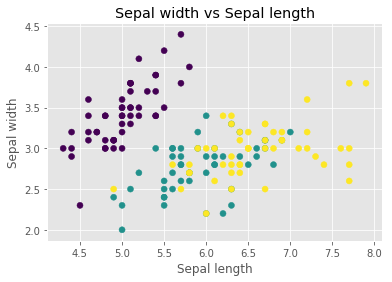

In [44]:
# Plota gráfico de disperssão dos dados com relação a classe.
# Disperssão dos dados de Sepal width e Sepal Length com as classes(0,1,2)
%matplotlib inline
from matplotlib import style
style.use("ggplot")
#sepal length vs sepal width
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(X_train.SepalLength.values,X_train.SepalWidth.values, c=classes_num)

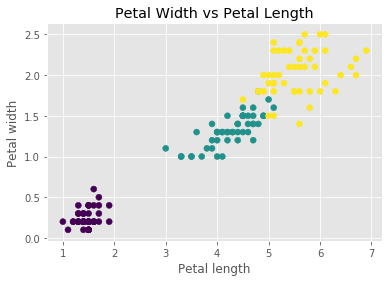

In [45]:
# Plota gráfico de disperssão dos dados com relação a classe.
# Disperssão dos dados de Petal width e Petal Length com as classes(0,1,2)
%matplotlib inline
from matplotlib import style
style.use("ggplot")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width vs Petal Length')
plt.scatter(X_train.PetalLength.values,X_train.PetalWidth.values, c=classes_num)

# Aplicando o SVM

* Vamos agora aplicar o SVM para classificar flores usando a base de dados Iris.

In [46]:
# Usaremos 80% dos dados para treino e 20% para teste.
# Visualizando o tamanho dos dados de treino.

X_train = X_train.head(120)
y_train = y_train.head(120)

In [47]:
len(X_train), len(y_train)

(120, 120)

In [48]:
# Visualizando os dados de treino
X_train.count()

SepalLength    120
SepalWidth     120
PetalLength    120
PetalWidth     120
dtype: int64

In [49]:
# Visualiando as classes correspondentes
y_train.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [50]:
# Instânciando o objeto do tipo sklearn (classificador SVM)
clf = svm.SVC()

In [51]:
# treina o algoritmo (gera o modelo)
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
# Cria um array com os dados de teste
# 20% dos dados que não foram vistos pelo classificador
teste = dataset_iris.tail(30)

In [53]:
# Visualizando os dados de teste
teste.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
120,6.9,3.2,5.7,2.3,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
123,6.3,2.7,4.9,1.8,Iris-virginica
124,6.7,3.3,5.7,2.1,Iris-virginica


In [54]:
# Faça você: Conte quantas linhas tem o conjunto de teste:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 120 to 149
Data columns (total 5 columns):
SepalLength    30 non-null float64
SepalWidth     30 non-null float64
PetalLength    30 non-null float64
PetalWidth     30 non-null float64
Species        30 non-null object
dtypes: float64(4), object(1)
memory usage: 1.3+ KB


In [55]:
len(teste)

30

In [56]:
# Dropa a coluna classe!!!
teste = teste.drop('Species', axis=1)

In [57]:
# Predizendo valores com a porção de dados de teste
clf.predict(teste)

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [58]:
# classes reais...
y_teste = dataset_iris.Species.tail(30)

In [59]:
y_teste

120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iris-virginica
135    Iris-virginica
136    Iris-virginica
137    Iris-virginica
138    Iris-virginica
139    Iris-virginica
140    Iris-virginica
141    Iris-virginica
142    Iris-virginica
143    Iris-virginica
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, dtype: object

## Visualizando os Resultados de Classificação

In [60]:
classes_num = pd.factorize(clf.predict(teste))[0]

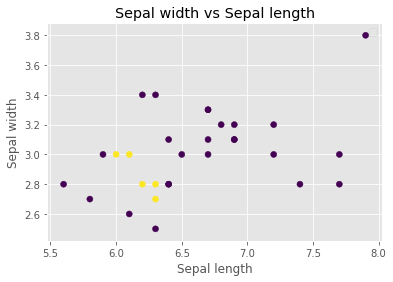

In [61]:
# Gráfico de disperssão entre as colunas Sepal Length , Sepatl width e a classe.
# Os pontos roxos são pontos no qual o classificador errou.
%matplotlib inline
from matplotlib import style
style.use("ggplot")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.legend([''])
plt.scatter(teste.SepalLength,teste.SepalWidth, c=classes_num)

# Matriz de Confusão

In [62]:
print (pd.crosstab(y_teste,clf.predict(teste),rownames=['Real'], colnames=['Predito'], margins=True),'')

Predito         Iris-versicolor  Iris-virginica  All
Real                                                
Iris-virginica                5              25   30
All                           5              25   30 


# Base de dados de músicas do Spotify

In [42]:
# Informações das Features da Base de dados.
# https://developer.spotify.com/web-api/get-audio-features/

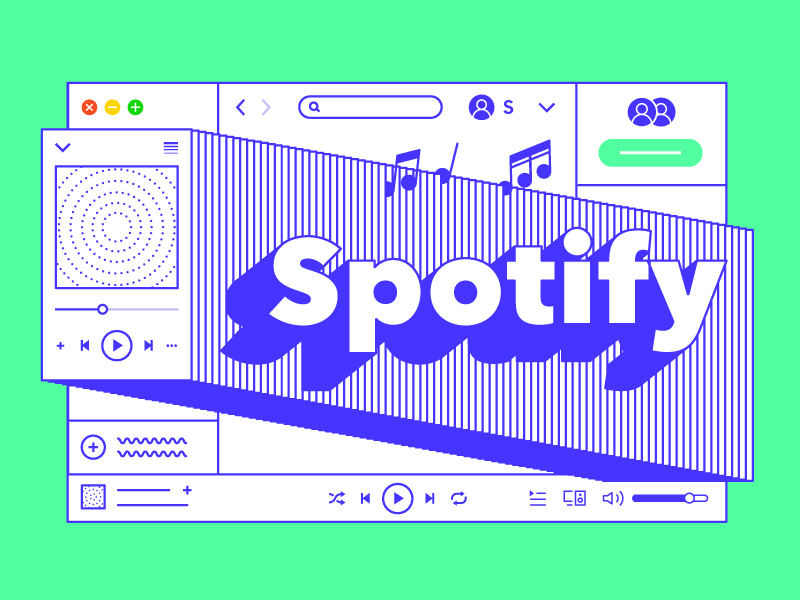

In [63]:
from IPython.display import Image
Image("imagens/spotify.jpg",width=400, height=400)

In [64]:
dataset = pd.read_csv('datasets/spotify.csv', sep=',')

In [65]:
dataset.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


# Análise de Dados

In [67]:
#Checando valores Missing
dataset.isnull().sum()

id                  0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [68]:
# Resumo Estatístico da base
# Somente dados numéricos
dataset.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [38]:
 # lista estilos disponíveis do Matplotlib
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

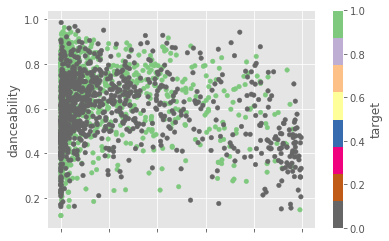

In [39]:
%matplotlib inline
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='acousticness', y='danceability', c='target', kind='scatter', colormap='Accent_r')

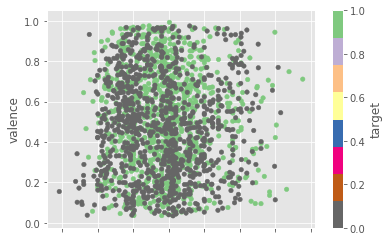

In [40]:
%matplotlib inline
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='tempo', y='valence', c='target', kind='scatter' , colormap='Accent_r')

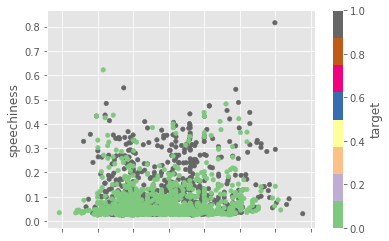

In [41]:
dataset.plot(x='tempo', y='speechiness', c='target', kind='scatter' , colormap='Accent')

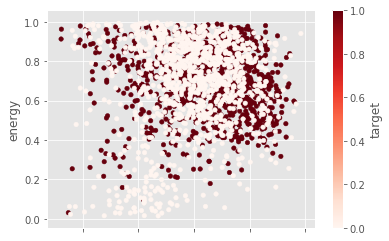

In [42]:
dataset.plot(x='danceability', y='energy', c='target', kind='scatter' , colormap='Reds')

# Separa a classe dos dados

In [43]:
classes = dataset['target']
dataset.drop('target', axis=1, inplace=True)

In [44]:
dataset.head(15)

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Parallel Lines,Junior Boys
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,Sneakin’,Drake
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,Childs Play,Drake
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,Gyöngyhajú lány,Omega
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,I've Seen Footage,Death Grips
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,Digital Animal,Honey Claws


# Pre-processamento de dados

In [45]:
def remove_features(lista_features):
    for i in lista_features:
        dataset.drop(i, axis=1, inplace=True)
    return 0

In [46]:
# Remove features

In [47]:
dataset.drop('id', axis=1, inplace=True)

In [48]:
dataset.drop('song_title', axis=1, inplace=True)

In [49]:
# Visualizando o dataset
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys


# Label Encoder

* Técnica para codificar valores categoricos em numéricos
* Um exemplo seria: a lista de cores: _(‘branco’,’preto’,’amarelo’,’vermelho’,'branco')_
* Após aplicar o LabelEncoder esta seria algo como __(1,2,3,4,1)__

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
enc = LabelEncoder()

In [52]:
inteiros = enc.fit_transform(dataset['artist'])

In [53]:
# Visualizando valores únicos.
set(inteiros)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [54]:
# Cria uma nova coluna chamada 'artist_inteiros'
dataset['artist_inteiros'] = inteiros

In [55]:
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys,628


In [56]:
# Faça você: Remova a feature artist

In [57]:
dataset.drop('artist', axis=1, inplace=True)

In [58]:
# Visualizando o Dataset alterado.
dataset.head(20)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_inteiros
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,449
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,222
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,449
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,95
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,628
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,356
6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,356
7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,869
8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,321
9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,516


# Pandas Get_dummies

* Cria uma matriz de presença com os valores unicos da base de dados.
* Técnica chamada One Hot Enconder

In [59]:
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,628


In [62]:
# Aplicando o get_dummies nos dados.
dataset = pd.get_dummies(dataset, columns=['artist_inteiros'], prefix=['artist'])

In [63]:
# Visualizando 'features' geradas.
dataset.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness',
       ...
       'artist_1333', 'artist_1334', 'artist_1335', 'artist_1336',
       'artist_1337', 'artist_1338', 'artist_1339', 'artist_1340',
       'artist_1341', 'artist_1342'],
      dtype='object', length=1356)

In [65]:
len(dataset.columns)

1356

In [66]:
# Visualizando as colunas
dataset.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
artist_0              uint8
artist_1              uint8
artist_2              uint8
artist_3              uint8
artist_4              uint8
artist_5              uint8
artist_6              uint8
artist_7              uint8
artist_8              uint8
artist_9              uint8
artist_10             uint8
artist_11             uint8
artist_12             uint8
artist_13             uint8
artist_14             uint8
artist_15             uint8
artist_16             uint8
                     ...   
artist_1313           uint8
artist_1314           uint8
artist_1315           uint8
artist_1316           uint8
artist_1317         

In [67]:
# checando missing values
dataset.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
artist_0            0
artist_1            0
artist_2            0
artist_3            0
artist_4            0
artist_5            0
artist_6            0
artist_7            0
artist_8            0
artist_9            0
artist_10           0
artist_11           0
artist_12           0
artist_13           0
artist_14           0
artist_15           0
artist_16           0
                   ..
artist_1313         0
artist_1314         0
artist_1315         0
artist_1316         0
artist_1317         0
artist_1318         0
artist_1319         0
artist_1320         0
artist_1321         0
artist_1322         0
artist_1323         0
artist_1324         0
artist_1325         0
artist_1326         0
artist_132

## Separar dados de treino e teste

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# Separa dados em 25% para teste aleatoriamente.
# tipo de aleatoriedade: random_state=42
# Rode várias vezes e perceba os resultados

X_train, X_test, y_train, y_test = train_test_split(dataset, classes)

In [70]:
X_train.count()

acousticness        1512
danceability        1512
duration_ms         1512
energy              1512
instrumentalness    1512
key                 1512
liveness            1512
loudness            1512
mode                1512
speechiness         1512
tempo               1512
time_signature      1512
valence             1512
artist_0            1512
artist_1            1512
artist_2            1512
artist_3            1512
artist_4            1512
artist_5            1512
artist_6            1512
artist_7            1512
artist_8            1512
artist_9            1512
artist_10           1512
artist_11           1512
artist_12           1512
artist_13           1512
artist_14           1512
artist_15           1512
artist_16           1512
                    ... 
artist_1313         1512
artist_1314         1512
artist_1315         1512
artist_1316         1512
artist_1317         1512
artist_1318         1512
artist_1319         1512
artist_1320         1512
artist_1321         1512


In [71]:
y_train.count()

1512

In [72]:
X_test.count()

acousticness        505
danceability        505
duration_ms         505
energy              505
instrumentalness    505
key                 505
liveness            505
loudness            505
mode                505
speechiness         505
tempo               505
time_signature      505
valence             505
artist_0            505
artist_1            505
artist_2            505
artist_3            505
artist_4            505
artist_5            505
artist_6            505
artist_7            505
artist_8            505
artist_9            505
artist_10           505
artist_11           505
artist_12           505
artist_13           505
artist_14           505
artist_15           505
artist_16           505
                   ... 
artist_1313         505
artist_1314         505
artist_1315         505
artist_1316         505
artist_1317         505
artist_1318         505
artist_1319         505
artist_1320         505
artist_1321         505
artist_1322         505
artist_1323     

In [73]:
y_test.count()

505

## Construindo e Validando Modelos

In [74]:
# Instância um objeto do tipo sklearn (classificador)
clf = svm.SVC()

In [75]:
# Imprime o tipo do objeto
type(clf)

sklearn.svm.classes.SVC

In [76]:
# Treina o algoritmo gerando o modelo.
# Passe os dados de treino e duas respectivas classes.
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
# Valida o modelo com os dados de teste.
# Imprime a acurácia do modelo.
clf.score(X_test,y_test)

0.5643564356435643

## Exercício

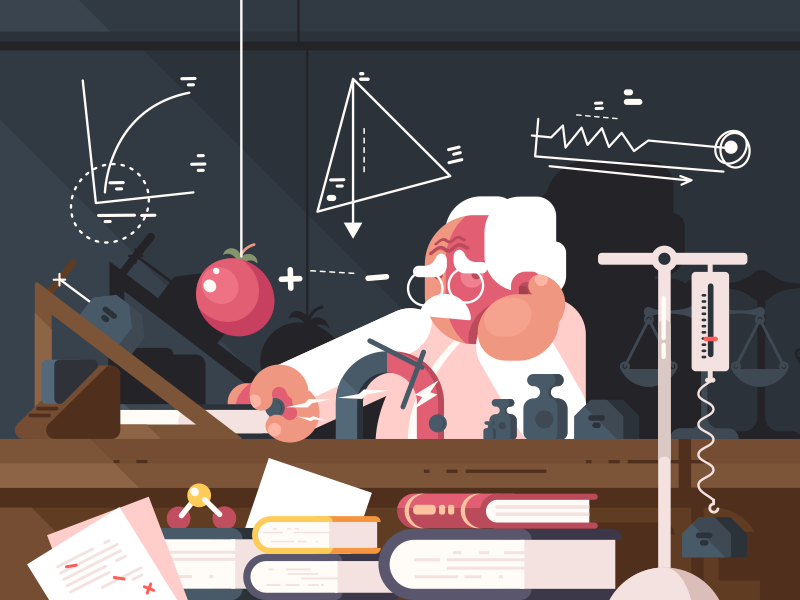

In [78]:
from IPython.display import Image
Image("imagens/entenda.png",width=400, height=400)

* Divida os dados usando o **train_test_split** novamente, gere o modelo e valide.
* Veja a diferença dos resultados.
* Discuta e responda porque acontece isso

## Cross Validation

In [79]:
# Validação cruzada com os resultados
resultados = cross_val_predict(clf, dataset, classes, cv=5)

In [81]:
 # calcula a acurácia do modelo
print (metrics.accuracy_score(classes,resultados))

0.5394149727317799


In [82]:
# Cria uma função que faz a validação cruzada e retorna a acurácia do modelo**
# Função que retorna a acurácia após fazer um validação cruzada (cross validation)
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=5)
    return metrics.accuracy_score(y,resultados)

## Pré-Processadores

* Existem diversos tipos de Pré-processadores
* Dados em diferentes escalas podem ser um problema para alguns algoritmos de Machine Learning
* Algoritmos que fazem cálculos para estimar pesos ou distância muitas vezes são afetados.

In [83]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

**Importa o módulo de StandardScaler**

In [84]:
from sklearn.preprocessing import StandardScaler

**Forma do Dado original**

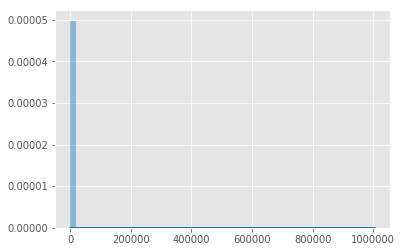

In [86]:
%matplotlib inline
sns.distplot(np.array(X_train).reshape(-1))
plt.show()

**Instancia o objeto Scaler**

In [87]:
scaler = StandardScaler()

In [88]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

**Aplica o Scaler nos dados**

In [89]:
X_train_scaler = scaler.fit_transform(X_train)

In [90]:
X_train_scaler

array([[-0.16033158,  0.64968137, -0.20002193, ..., -0.02572573,
         0.        , -0.02572573],
       [ 0.98922513, -0.65385457, -0.02570355, ..., -0.02572573,
         0.        , -0.02572573],
       [-0.62053873,  0.20887212, -0.60280663, ..., -0.02572573,
         0.        , -0.02572573],
       ...,
       [-0.58170755,  0.61189772, -0.86198053, ..., -0.02572573,
         0.        , -0.02572573],
       [ 0.20875686, -0.09969436,  0.06866349, ..., -0.02572573,
         0.        , -0.02572573],
       [ 1.01229316,  1.21013885, -0.21030529, ..., -0.02572573,
         0.        , -0.02572573]])

**Plota a forma dos dados scalados**

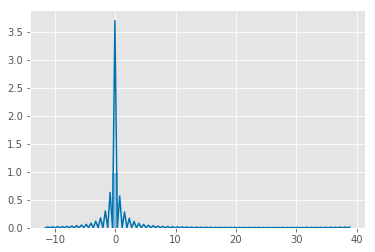

In [92]:
%matplotlib inline
sns.distplot(np.array(X_train_scaler).reshape(-1))
plt.show()

# Pipeline

In [93]:
# Importe as bibliotecas de Pipelines e Pré-processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Pipelines com Pré-Processadores

In [94]:
# Criando um pipeline
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC())
])

In [95]:
# Imprimindo Etapas do Pipeline
pip_1.steps

[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]

In [96]:
# Chama a função acuracia passando os dados de musicas e as classes
# Usando o pipeline pip_1
Acuracia(pip_1,dataset,classes)

0.5681705503222608

In [97]:
# Criando vários Pipelines
pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

In [98]:
# Usando o pipeline pip_2 , teste com MinMaxScaler
Acuracia(pip_2,dataset,classes)

0.5057015369360436

# Testando o Desempenho dos Kernels

In [99]:
# Testando o Kernel RBF
Acuracia(pip_3,dataset,classes)

0.5681705503222608

In [100]:
# Teste de kernel polynomial
Acuracia(pip_4,dataset,classes)

0.5523054040654437

In [101]:
# Teste de Kernel linear
Acuracia(pip_5,dataset,classes)

0.6127912741695587


# Tunning

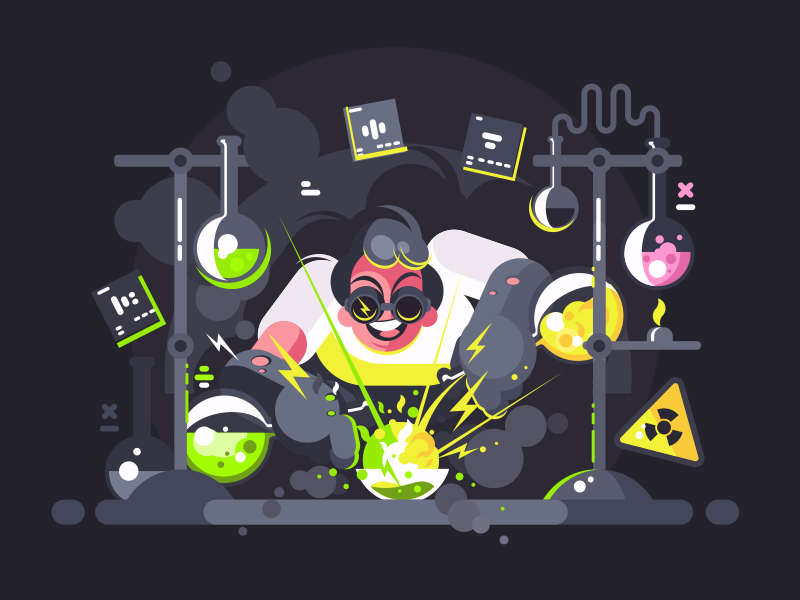

In [102]:
from IPython.display import Image
Image("imagens/tuning.png",width=400, height=400)

* Fazer tuning nos parâmetros do algoritmo.
* Use uma ferramenta para automatizar os testes exaustivos.
* A combinação dos parâmetros também devem ser testadas.

In [103]:
# Importa o utilitário GridSearchCV
from sklearn.model_selection import GridSearchCV

In [104]:
# Lista de Valores de C
lista_C = [0.001, 0.01, 0.1, 1, 10, 100]

# Lista de Valores de gamma
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

In [105]:
# Define um dicionário que recebe as listas de parâmetros e valores.
parametros_grid = dict(clf__C=lista_C, clf__gamma=lista_gamma)

In [106]:
parametros_grid

{'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [107]:
# Objeto Grid recebe parâmetros de Pipeline, e configurações de cross validation
grid = GridSearchCV(pip_3, parametros_grid, cv=5, scoring='accuracy')

In [108]:
# Aplica o gridsearch passando os dados de treino e classes.
grid.fit(dataset,classes)

KeyboardInterrupt: 

# Resultados de Grid

In [ ]:
# Imprime os scores por combinações
grid.grid_scores_

In [ ]:
# Imprime os melhores parâmetros
grid.best_params_

In [ ]:
grid.best_score_

# Métricas de Avaliação

In [ ]:
# Faça Você: Crie o pipeline com o kernel rbf e defina os parâmetros que tiveram melhor desempenho


In [ ]:
# Imprime as métricas: 'precisão, revocação e Medida F1.
resultados = cross_val_predict(pip_3, dataset, classes, cv=5)
valor_classes = [0,1]
print (metrics.classification_report(classes,resultados,valor_classes))

## Matriz de Confusão

In [ ]:
print (pd.crosstab(classes,resultados,rownames=['Real'], colnames=['Predito'], margins=True),'')

## Como melhorar?

* Teste outros modelagens, explore outros pré-processadores.
* Entenda e tuning outros parâmetros do algoritmo.
* Use a criatividade para fazer engenharia de features.